In [15]:
# Analysis
import pandas as pd
import numpy as np

%matplotlib inline 
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것

# Visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# 한글설정 
import matplotlib.font_manager as fm
import copy

font_path = "C:/Windows/Fonts/MALGUN.TTF"
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rc('xtick', labelsize=10)
mpl.rcParams['axes.unicode_minus'] = False

In [16]:
train = pd.read_csv("../data/train_without_error.csv")
test = pd.read_csv("../data/test_without_error.csv")

train.shape, test.shape

((2869, 15), (1008, 14))

In [17]:
train.columns = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', 
                 '전용면적', '전용면적별세대수', '공가수', '자격유형', '임대보증금', 
                 '임대료', '지하철', '버스', '단지내주차면수', '등록차량수']

test.columns = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', 
                '전용면적', '전용면적별세대수', '공가수', '자격유형', '임대보증금', 
                '임대료', '지하철', '버스', '단지내주차면수']

### 결측치 확인

In [18]:
train.isna().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금       569
임대료         569
지하철         207
버스            0
단지내주차면수       0
등록차량수         0
dtype: int64

In [19]:
test.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          2
임대보증금       180
임대료         180
지하철          38
버스            0
단지내주차면수       0
dtype: int64

##### 결측치 처리 ) 1. 자격유형

In [20]:
test.loc[test['자격유형'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수
196,C2411,961,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000,37470,0.0,2.0,840.0
258,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,44770,0.0,2.0,173.0


* 자격유형 NaN 값을 처리해주기 위해 단지코드, 임대건물구분, 지역 컬럼을 이용해 해당 값을 추측해보자.

In [21]:
grouped = test.groupby(['단지코드', '임대건물구분', '지역'])
group1 = grouped.get_group(('C2411', '아파트', '경상남도'))
group1

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수
193,C2411,961,아파트,경상남도,국민임대,39.43,56,25.0,A,11992000,100720,0.0,2.0,840.0
194,C2411,961,아파트,경상남도,국민임대,39.72,336,25.0,A,11992000,100720,0.0,2.0,840.0
195,C2411,961,아파트,경상남도,국민임대,39.82,179,25.0,A,11992000,100720,0.0,2.0,840.0
196,C2411,961,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000,37470,0.0,2.0,840.0
197,C2411,961,아파트,경상남도,국민임대,51.93,150,25.0,A,21586000,171480,0.0,2.0,840.0


In [22]:
test.loc[196, '자격유형'] = 'A'

In [25]:
group2 = grouped.get_group(('C2253', '아파트', '강원도'))
group2

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수
258,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,44770,0.0,2.0,173.0
259,C2253,1161,아파트,강원도,영구임대,31.32,239,0.0,C,3731000,83020,0.0,2.0,173.0
260,C2253,1161,아파트,강원도,영구임대,31.32,149,0.0,C,3731000,83020,0.0,2.0,173.0


In [26]:
test.loc[258,'자격유형'] = 'C'

In [27]:
test.loc[test['자격유형'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수


##### test 자격유형 결측치 처리 완료

##### 결측치 처리 ) 2. 지하철

In [29]:
train.isna().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금       569
임대료         569
지하철         207
버스            0
단지내주차면수       0
등록차량수         0
dtype: int64

In [30]:
test.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금       180
임대료         180
지하철          38
버스            0
단지내주차면수       0
dtype: int64

In [132]:
group_subway = train.groupby('지역')['지하철']
group_subway.var() # 지역별 지하철 분산

지역
강원도        0.000000
경기도        0.223467
경상남도       0.000000
경상북도       0.000000
광주광역시      0.000000
대구광역시      0.488546
대전광역시      0.201640
부산광역시      0.384193
서울특별시      0.186122
세종특별자치시    0.000000
울산광역시      0.000000
전라남도       0.000000
전라북도       0.000000
제주특별자치도    0.000000
충청남도       0.000000
충청북도       0.000000
Name: 지하철, dtype: float64

In [133]:
for g, sub in group_subway:
    print(g)
    print(sub)

강원도
59      0.0
60      0.0
61      0.0
62      0.0
63      0.0
       ... 
2864    0.0
2865    0.0
2866    0.0
2867    0.0
2868    0.0
Name: 지하철, Length: 187, dtype: float64
경기도
18      1.0
19      1.0
20      1.0
21      1.0
22      1.0
       ... 
2844    0.0
2845    0.0
2846    0.0
2847    0.0
2848    0.0
Name: 지하철, Length: 595, dtype: float64
경상남도
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2772    0.0
2773    0.0
2774    0.0
2775    0.0
2776    0.0
Name: 지하철, Length: 363, dtype: float64
경상북도
867     0.0
868     0.0
869     0.0
870     0.0
871     0.0
       ... 
2737    0.0
2738    0.0
2739    0.0
2740    0.0
2741    0.0
Name: 지하철, Length: 111, dtype: float64
광주광역시
65      0.0
66      0.0
67      0.0
68      0.0
69      0.0
       ... 
2797    0.0
2798    0.0
2799    0.0
2800    0.0
2801    0.0
Name: 지하철, Length: 141, dtype: float64
대구광역시
1175    0.0
1176    0.0
1177    0.0
1178    0.0
1179    0.0
       ... 
2824    0.0
2825    0.0
2826    0.0
2827   

지역
강원도        AxesSubplot(0.125,0.125;0.775x0.755)
경기도        AxesSubplot(0.125,0.125;0.775x0.755)
경상남도       AxesSubplot(0.125,0.125;0.775x0.755)
경상북도       AxesSubplot(0.125,0.125;0.775x0.755)
광주광역시      AxesSubplot(0.125,0.125;0.775x0.755)
대구광역시      AxesSubplot(0.125,0.125;0.775x0.755)
대전광역시      AxesSubplot(0.125,0.125;0.775x0.755)
부산광역시      AxesSubplot(0.125,0.125;0.775x0.755)
서울특별시      AxesSubplot(0.125,0.125;0.775x0.755)
세종특별자치시    AxesSubplot(0.125,0.125;0.775x0.755)
울산광역시      AxesSubplot(0.125,0.125;0.775x0.755)
전라남도       AxesSubplot(0.125,0.125;0.775x0.755)
전라북도       AxesSubplot(0.125,0.125;0.775x0.755)
제주특별자치도    AxesSubplot(0.125,0.125;0.775x0.755)
충청남도       AxesSubplot(0.125,0.125;0.775x0.755)
충청북도       AxesSubplot(0.125,0.125;0.775x0.755)
Name: 지하철, dtype: object

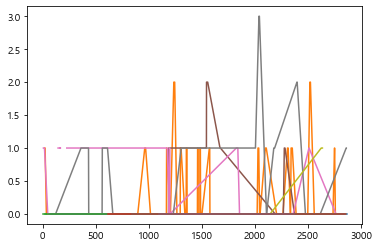

In [140]:
%matplotlib inline

group_subway.plot()

In [68]:
train['지역별지하철분산'] = group_subway.var() # NaN이 너무 많이 발생...
train.drop('지역별지하철분산', axis=1)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,82940,0.0,3.0,624.0,205.0
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,107130,0.0,3.0,624.0,205.0
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000,107130,0.0,3.0,624.0,205.0
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000,149760,0.0,3.0,624.0,205.0
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000,149760,0.0,3.0,624.0,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2864,C2532,239,아파트,강원도,국민임대,49.20,19,7.0,A,11346000,116090,0.0,1.0,166.0,146.0
2865,C2532,239,아파트,강원도,국민임대,51.08,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0
2866,C2532,239,아파트,강원도,국민임대,51.73,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0
2867,C2532,239,아파트,강원도,국민임대,51.96,114,7.0,A,14005000,142310,0.0,1.0,166.0,146.0


In [59]:
group_subway.std() # 지역별 지하철 표준편차

지역
강원도        0.000000
경기도        0.472723
경상남도       0.000000
경상북도       0.000000
광주광역시      0.000000
대구광역시      0.698961
대전광역시      0.449043
부산광역시      0.619833
서울특별시      0.431419
세종특별자치시    0.000000
울산광역시      0.000000
전라남도       0.000000
전라북도       0.000000
제주특별자치도    0.000000
충청남도       0.000000
충청북도       0.000000
Name: 지하철, dtype: float64

In [118]:
sub_mean = group_subway.mean()
sub_mean

지역
강원도        0.000000
경기도        0.210084
경상남도       0.000000
경상북도       0.000000
광주광역시      0.000000
대구광역시      0.460784
대전광역시      0.722543
부산광역시      0.533537
서울특별시      0.240000
세종특별자치시    0.000000
울산광역시      0.000000
전라남도       0.000000
전라북도       0.000000
제주특별자치도    0.000000
충청남도       0.000000
충청북도       0.000000
Name: 지하철, dtype: float64

In [119]:
train['지하철'].fillna(sub_mean, inplace=True)  ### 왜 적용이 안될까??

In [120]:
train.isnull().sum()

단지코드           0
총세대수           0
임대건물구분         0
지역             0
공급유형           0
전용면적           0
전용면적별세대수       0
공가수            0
자격유형           0
임대보증금        569
임대료          569
지하철          207
버스             0
단지내주차면수        0
등록차량수          0
지역별지하철분산    2869
dtype: int64

In [ ]:
mg_fill_val = {}

In [74]:
nan_sub = train.loc[train['지하철'].isnull()].index
print(type(nan_sub))

<class 'pandas.core.indexes.numeric.Int64Index'>


In [107]:
mg = group_subway.mean()
new_data = {0:mg, 'nan': mg }
mg

지역
강원도        0.000000
경기도        0.210084
경상남도       0.000000
경상북도       0.000000
광주광역시      0.000000
대구광역시      0.460784
대전광역시      0.722543
부산광역시      0.533537
서울특별시      0.240000
세종특별자치시    0.000000
울산광역시      0.000000
전라남도       0.000000
전라북도       0.000000
제주특별자치도    0.000000
충청남도       0.000000
충청북도       0.000000
Name: 지하철, dtype: float64

In [ ]:
train['지하철'].fillna(new_data, inplace=True)

In [106]:
train['지하철'].unique()

array([ 0.,  1., nan,  2.,  3.])

In [ ]:
해당 지역에 지역별 지하철 분산을 넣어주기

##### 결측치 처리 ) 3. 버스

In [61]:
group_bus = train.groupby('지역')['버스']
group_bus

In [62]:
group_bus.var() # 지역별 버스의 분산

지역
강원도         3.084009
경기도        10.969001
경상남도       12.304096
경상북도        3.854218
광주광역시       3.951773
대구광역시       4.770821
대전광역시       8.250135
부산광역시       1.563055
서울특별시       4.326531
세종특별자치시     0.000000
울산광역시       1.269162
전라남도        2.357096
전라북도        3.809378
제주특별자치도     7.912576
충청남도        7.977949
충청북도        1.595698
Name: 버스, dtype: float64

In [63]:
group_bus.std() # 지역별 버스의 표준편차

지역
강원도        1.756135
경기도        3.311948
경상남도       3.507719
경상북도       1.963216
광주광역시      1.987907
대구광역시      2.184221
대전광역시      2.872305
부산광역시      1.250222
서울특별시      2.080031
세종특별자치시    0.000000
울산광역시      1.126571
전라남도       1.535284
전라북도       1.951763
제주특별자치도    2.812930
충청남도       2.824526
충청북도       1.263209
Name: 버스, dtype: float64

In [64]:
group_bus.mean() # 지역별 버스의 평균값

지역
강원도        3.422460
경기도        4.363025
경상남도       3.834711
경상북도       3.018018
광주광역시      3.496454
대구광역시      3.735294
대전광역시      4.714286
부산광역시      2.448171
서울특별시      4.400000
세종특별자치시    2.000000
울산광역시      2.941176
전라남도       3.435374
전라북도       3.073394
제주특별자치도    5.274725
충청남도       3.677215
충청북도       2.944785
Name: 버스, dtype: float64

In [36]:
train.loc[(train['지하철'].isnull())&(train['단지코드']=='C1312')]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
86,C1312,517,아파트,충청남도,국민임대,39.72,60,12.0,A,17460000,122210,NaN,3.0,527.0,359.0
87,C1312,517,아파트,충청남도,국민임대,39.98,89,12.0,A,17460000,122210,NaN,3.0,527.0,359.0
88,C1312,517,아파트,충청남도,국민임대,41.55,225,12.0,A,19954000,130940,NaN,3.0,527.0,359.0
89,C1312,517,아파트,충청남도,국민임대,46.90,143,12.0,A,28687000,149660,NaN,3.0,527.0,359.0


In [49]:
train.loc[(train['지하철'].isnull())&(train['지역']=='충청남도')]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
86,C1312,517,아파트,충청남도,국민임대,39.72,60,12.0,A,17460000,122210,NaN,3.0,527.0,359.0
87,C1312,517,아파트,충청남도,국민임대,39.98,89,12.0,A,17460000,122210,NaN,3.0,527.0,359.0
88,C1312,517,아파트,충청남도,국민임대,41.55,225,12.0,A,19954000,130940,NaN,3.0,527.0,359.0
89,C1312,517,아파트,충청남도,국민임대,46.90,143,12.0,A,28687000,149660,NaN,3.0,527.0,359.0
90,C1874,619,아파트,충청남도,영구임대,26.37,294,2.0,C,3141000,69900,NaN,2.0,97.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,C2156,305,아파트,충청남도,국민임대,39.57,120,0.0,A,11147000,90410,NaN,1.0,246.0,204.0
799,C2156,305,아파트,충청남도,국민임대,51.93,65,0.0,A,19819000,127580,NaN,1.0,246.0,204.0
831,C1175,468,아파트,충청남도,국민임대,46.90,198,15.0,A,21134000,128070,NaN,2.0,477.0,430.0
832,C1175,468,아파트,충청남도,국민임대,51.93,90,15.0,A,26258000,160100,NaN,2.0,477.0,430.0


* 지하철 및 버스는 분산, 평균, 표준편차 세 가지 중 제일 높은 점수를 받을 수 있는 것을 찾아보자

* fillna() 관련하여 질문해보기